<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#ルール" data-toc-modified-id="ルール-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ルール</a></span></li><li><span><a href="#参考情報" data-toc-modified-id="参考情報-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>参考情報</a></span></li><li><span><a href="#Q学習" data-toc-modified-id="Q学習-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Q学習</a></span></li><li><span><a href="#インポート" data-toc-modified-id="インポート-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>インポート</a></span></li><li><span><a href="#関数定義" data-toc-modified-id="関数定義-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>関数定義</a></span><ul class="toc-item"><li><span><a href="#Q値のプロット関数" data-toc-modified-id="Q値のプロット関数-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Q値のプロット関数</a></span></li></ul></li><li><span><a href="#メイン関数" data-toc-modified-id="メイン関数-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>メイン関数</a></span></li></ul></div>

# ルール
https://github.com/openai/gym/wiki/CartPole-v0


# 参考情報
https://deepage.net/machine_learning/2017/08/10/reinforcement-learning.html

# Q学習
<img src="Q_Learning.png", width=500>

オレンジのパスがQ値を最大にするパスである場合、
$$\begin{eqnarray}
Q(s_0,b) &=& r_2 + \gamma Q(s_2,a)  \\
         &=& r_2 + \gamma r_5 + \gamma^2 Q(s_5,a) \\
         &=& r_2 + \gamma r_5 + \gamma^2 r_9
\end{eqnarray}$$

# インポート

In [1]:
import gym
import numpy as np
import pickle
from __future__ import print_function

# 関数定義

In [2]:
def bins(clip_min, clip_max, num):
    '''離散値テーブル作成
    '''
    return np.linspace(clip_min, clip_max, num + 1)[1:-1]

def get_state(observation):
    '''観測値をstateに変換
    '''
    pos, vel, ang, omg = observation
    '''
    digitized = [np.digitize(ang, bins=bins(-0.2, 0.2, nb_ang)).reshape(1)[0],
                 np.digitize(omg, bins=bins(-2.0, 2.0, nb_omg)).reshape(1)[0]]
    '''
    '''
    digitized = [np.digitize(pos, bins=bins(-0.3, 0.3, nb_pos)).reshape(1)[0],
                 np.digitize(ang, bins=bins(-0.2, 0.2, nb_ang)).reshape(1)[0],
                 np.digitize(omg, bins=bins(-2.0, 2.0, nb_omg)).reshape(1)[0]]
    '''
    
    digitized = [np.digitize(pos, bins=bins(-0.8, 0.8, nb_pos)).reshape(1)[0],
                 np.digitize(ang, bins=bins(-0.2, 0.2, nb_ang)).reshape(1)[0],
                 np.digitize(omg, bins=bins(-2.0, 2.0, nb_omg)).reshape(1)[0]]
    
    '''
    digitized = [np.digitize(pos, bins=bins(-2.4, 2.4, nb_pos)).reshape(1)[0],
                 np.digitize(vel, bins=bins(-2.0, 2.0, nb_vel)).reshape(1)[0],
                 np.digitize(ang, bins=bins(-0.2, 0.2, nb_ang)).reshape(1)[0],
                 np.digitize(omg, bins=bins(-2.0, 2.0, nb_omg)).reshape(1)[0]]
    '''
    '''
    digitized = [np.digitize(pos, bins=bins(-2.4, 2.4, nb_pos)).reshape(1)[0],
                 np.digitize(vel, bins=bins(-3.0, 3.0, nb_vel)).reshape(1)[0],
                 np.digitize(ang, bins=bins(-0.5, 0.5, nb_ang)).reshape(1)[0],
                 np.digitize(omg, bins=bins(-2.0, 2.0, nb_omg)).reshape(1)[0]]
    '''
    return digitized

def get_action( state, explore_rate ):
    ''' stateにおけるQ値の高いaction とそのQ値を返す'''
    if np.random.uniform( 0, 1 ) < explore_rate:
        action = np.random.choice([0,1])
    else:
        action = q_table[tuple(state)].argmax() # 0 or 1   
    return action

def get_q_value( state ):
    q_value = q_table[tuple(state)].max()
    return q_value
    
def update_q_table( state, action, reward, q_value ):
    ''' Q_tableを更新
    '''
    pos = tuple(state + [ action ])
    q_table[pos] += alpha * ( reward + gamma * q_value - q_table[pos] )
    return

def get_explore( last_rewards_mean ):
    xx = 1.0 - np.power( last_rewards_mean / float(max_steps ), 0.2 )
    xx = np.clip( xx, 0.01, 0.5 )
    return xx

## Q値のプロット関数

In [3]:
def plot_q_table( q_table ):
    plt.clf()
    pos = range( q_table.shape[0]/2-2, q_table.shape[0]/2+2, 1 )
    width = len(pos)*2
    for i in range(width):
        data = q_table[pos[int(i/2)],...,i&1]
        #print( 'shape=%s, i= %d'%(data.shape, i) )
        plt.subplot(2,width,i+1)
        plt.pcolor( data.T, cmap='bwr')
        plt.xlabel('angle')
        plt.ylabel('omega')
        plt.title( 'act= %d'%(i&1))
        
        plt.subplot(2,width,i+width+1)
        plt.plot( data,'o-', markersize=2 )
        
    plt.tight_layout()
    plt.draw()


In [4]:
def plot_q_table_bkh( q_table ):
    bkfig.image( image=[q_table[...,0]], x=0, y=0, dw=16, dh=16, palette="Spectral11" )
    bkh.show(bkfig)

In [9]:
%qtconsole


# メイン関数

In [12]:
pass_reward = 200 # 195
max_steps = 200
num_episodes = 5000 # 5000
last_rewards = np.zeros(100) # 直近100 episodes 分の報酬を保持。初期値は０

nb_pos = 8
nb_vel = 2
nb_ang = 14 # 5 #7
nb_omg = 16 # 5 #7
nb_act = 2 # == env.action_space.n

alpha = 0.1
gamma = 0.99
#epsilon = 0.1

#q_table = np.random.uniform(-1, 1, size=( nb_pos, nb_vel, nb_ang, nb_omg, nb_act))
#q_table = np.random.uniform(-1, 1, size=( nb_ang, nb_omg, nb_act))
q_table = np.random.uniform(-1, 1, size=( nb_pos, nb_ang, nb_omg, nb_act))

obs = np.zeros((1,4),dtype=np.float32)

In [13]:
#import bokeh.plotting as bkh
#bkh.output_notebook()
#bkfig = bkh.figure(x_range=(0, 16), y_range=(0, 16))
%matplotlib
fig = plt.figure(figsize=[13,4])
plt.show()

Using matplotlib backend: Qt5Agg


In [14]:
env = gym.make('CartPole-v0')
flog = open( '_logfile.txt','w')
cnt = 0

for episode in range(num_episodes):
    # 環境の初期化
    observation = env.reset()

    # Rewardの総和をクリア
    episode_reward = 0
    explore_rate = get_explore( last_rewards.mean() )

    # State取得
    state = get_state( observation )

    for t in range(max_steps):
        cnt+=1
        # CartPoleの描画
        env.render()

        # 行動の実行とフィードバックの取得
        action = get_action( state, explore_rate )
        observation, reward, done, info = env.step(action)
        episode_reward += reward
        #reward2 = reward - np.minimum( 0.9 ,observation[0]*observation[0]  )
        #reward2 = reward - observation[0]*observation[0]*10
        reward2 = reward - observation[0] ** 2
        
        flog.write( 'Obs= [% .3f % .3f % .3f % .3f]' % tuple(observation) +\
                    ' St= ' + str(state) +\
                    ' Ac= ' + str(action) +\
                    ' Q= % .4f'%(q_table[tuple(state+[action])]) +\
                    ' Rw= %.4f'% (reward2) +\
                    '\n')       
        obs = np.vstack( ( obs, observation.reshape(1,4).astype(np.float32)))
        
        #if done and (t < (max_steps-1) ):
        #    reward2 = -200
        #    flog.write( 'Rw= '+str(reward2)+'\n' )
            
        # 遷移先のStateの算出
        state_next = get_state( observation )
        
        # 次の行動の選択（Q値最大パス )
        q_value = get_q_value( state_next )
        
        # Q 値更新
        update_q_table( state, action, reward2, q_value )
        
        # パラメータ更新
        state = state_next

        if done:
            last_rewards[:-1] = last_rewards[1:]
            last_rewards[-1] = episode_reward
            print('## %dth Episode done in %.0f steps. rewards %.4f exp=%.3f' % \
                  (episode, t + 1, last_rewards.mean(), explore_rate ) )
            flog.write('## %dth Episode done in %.0f steps. rewards %.4f exp=%.3f \n' % \
                  (episode, t + 1, last_rewards.mean(), explore_rate ) )
            break
       
        if cnt%512 == 0:
            plot_q_table( q_table )            

    # 直近の100エピソードが195以上であれば成功
    #if (last_rewards.mean() >= pass_reward ): 
    #    print('Episode %d train pass!' % episode)
    #    break

# 絵を消す
env.close()
flog.close()

## 0th Episode done in 14 steps. rewards 0.1400 exp=0.500
## 1th Episode done in 10 steps. rewards 0.2400 exp=0.500
## 2th Episode done in 15 steps. rewards 0.3900 exp=0.500
## 3th Episode done in 15 steps. rewards 0.5400 exp=0.500
## 4th Episode done in 14 steps. rewards 0.6800 exp=0.500
## 5th Episode done in 13 steps. rewards 0.8100 exp=0.500
## 6th Episode done in 12 steps. rewards 0.9300 exp=0.500
## 7th Episode done in 9 steps. rewards 1.0200 exp=0.500
## 8th Episode done in 17 steps. rewards 1.1900 exp=0.500
## 9th Episode done in 19 steps. rewards 1.3800 exp=0.500
## 10th Episode done in 10 steps. rewards 1.4800 exp=0.500
## 11th Episode done in 11 steps. rewards 1.5900 exp=0.500
## 12th Episode done in 17 steps. rewards 1.7600 exp=0.500
## 13th Episode done in 18 steps. rewards 1.9400 exp=0.500
## 14th Episode done in 14 steps. rewards 2.0800 exp=0.500
## 15th Episode done in 12 steps. rewards 2.2000 exp=0.500
## 16th Episode done in 14 steps. rewards 2.3400 exp=0.500
## 17th 

## 138th Episode done in 20 steps. rewards 18.7800 exp=0.377
## 139th Episode done in 13 steps. rewards 18.7100 exp=0.377
## 140th Episode done in 15 steps. rewards 18.7300 exp=0.377
## 141th Episode done in 15 steps. rewards 18.7400 exp=0.377
## 142th Episode done in 14 steps. rewards 18.7700 exp=0.377
## 143th Episode done in 15 steps. rewards 18.7900 exp=0.377
## 144th Episode done in 47 steps. rewards 19.1300 exp=0.377
## 145th Episode done in 17 steps. rewards 19.1900 exp=0.375
## 146th Episode done in 35 steps. rewards 19.3800 exp=0.374
## 147th Episode done in 11 steps. rewards 19.1700 exp=0.373
## 148th Episode done in 16 steps. rewards 19.2000 exp=0.374
## 149th Episode done in 25 steps. rewards 19.3400 exp=0.374
## 150th Episode done in 28 steps. rewards 19.4500 exp=0.373
## 151th Episode done in 21 steps. rewards 19.4400 exp=0.373
## 152th Episode done in 13 steps. rewards 19.4100 exp=0.373
## 153th Episode done in 31 steps. rewards 19.5500 exp=0.373
## 154th Episode done in

## 273th Episode done in 16 steps. rewards 21.0100 exp=0.363
## 274th Episode done in 29 steps. rewards 21.2100 exp=0.363
## 275th Episode done in 29 steps. rewards 21.3600 exp=0.362
## 276th Episode done in 23 steps. rewards 21.2900 exp=0.361
## 277th Episode done in 17 steps. rewards 21.2100 exp=0.361
## 278th Episode done in 11 steps. rewards 21.2000 exp=0.362
## 279th Episode done in 13 steps. rewards 21.2200 exp=0.362
## 280th Episode done in 13 steps. rewards 21.2000 exp=0.362
## 281th Episode done in 20 steps. rewards 21.2600 exp=0.362
## 282th Episode done in 17 steps. rewards 21.2200 exp=0.361
## 283th Episode done in 37 steps. rewards 21.4100 exp=0.362
## 284th Episode done in 22 steps. rewards 21.4600 exp=0.360
## 285th Episode done in 25 steps. rewards 21.6100 exp=0.360
## 286th Episode done in 15 steps. rewards 21.5800 exp=0.359
## 287th Episode done in 9 steps. rewards 21.5100 exp=0.359
## 288th Episode done in 11 steps. rewards 21.4900 exp=0.360
## 289th Episode done in 

## 408th Episode done in 33 steps. rewards 24.9400 exp=0.342
## 409th Episode done in 20 steps. rewards 24.8900 exp=0.341
## 410th Episode done in 17 steps. rewards 24.9200 exp=0.341
## 411th Episode done in 77 steps. rewards 25.3500 exp=0.341
## 412th Episode done in 14 steps. rewards 25.1700 exp=0.338
## 413th Episode done in 12 steps. rewards 25.0600 exp=0.339
## 414th Episode done in 31 steps. rewards 25.2200 exp=0.340
## 415th Episode done in 21 steps. rewards 25.2200 exp=0.339
## 416th Episode done in 34 steps. rewards 25.3400 exp=0.339
## 417th Episode done in 25 steps. rewards 24.9200 exp=0.338
## 418th Episode done in 31 steps. rewards 24.7100 exp=0.341
## 419th Episode done in 27 steps. rewards 24.5100 exp=0.342
## 420th Episode done in 30 steps. rewards 24.5600 exp=0.343
## 421th Episode done in 12 steps. rewards 24.5400 exp=0.343
## 422th Episode done in 32 steps. rewards 24.6500 exp=0.343
## 423th Episode done in 19 steps. rewards 24.6400 exp=0.342
## 424th Episode done in

## 543th Episode done in 72 steps. rewards 31.5500 exp=0.310
## 544th Episode done in 96 steps. rewards 32.1600 exp=0.309
## 545th Episode done in 71 steps. rewards 32.6400 exp=0.306
## 546th Episode done in 33 steps. rewards 32.7200 exp=0.304
## 547th Episode done in 66 steps. rewards 32.9800 exp=0.304
## 548th Episode done in 45 steps. rewards 33.2200 exp=0.303
## 549th Episode done in 33 steps. rewards 32.8900 exp=0.302
## 550th Episode done in 52 steps. rewards 32.9900 exp=0.303
## 551th Episode done in 22 steps. rewards 32.7600 exp=0.303
## 552th Episode done in 9 steps. rewards 32.5500 exp=0.304
## 553th Episode done in 128 steps. rewards 33.2500 exp=0.304
## 554th Episode done in 42 steps. rewards 33.4400 exp=0.302
## 555th Episode done in 28 steps. rewards 33.3500 exp=0.301
## 556th Episode done in 103 steps. rewards 34.1500 exp=0.301
## 557th Episode done in 10 steps. rewards 34.0900 exp=0.298
## 558th Episode done in 24 steps. rewards 34.1700 exp=0.298
## 559th Episode done i

## 678th Episode done in 38 steps. rewards 48.0200 exp=0.247
## 679th Episode done in 51 steps. rewards 48.0300 exp=0.248
## 680th Episode done in 15 steps. rewards 48.0000 exp=0.248
## 681th Episode done in 30 steps. rewards 48.1400 exp=0.248
## 682th Episode done in 26 steps. rewards 48.2100 exp=0.248
## 683th Episode done in 55 steps. rewards 48.2300 exp=0.248
## 684th Episode done in 110 steps. rewards 48.7900 exp=0.248
## 685th Episode done in 13 steps. rewards 48.3100 exp=0.246
## 686th Episode done in 40 steps. rewards 48.5800 exp=0.247
## 687th Episode done in 31 steps. rewards 48.5900 exp=0.246
## 688th Episode done in 36 steps. rewards 48.8500 exp=0.246
## 689th Episode done in 148 steps. rewards 50.1000 exp=0.246
## 690th Episode done in 80 steps. rewards 50.6700 exp=0.242
## 691th Episode done in 86 steps. rewards 51.0400 exp=0.240
## 692th Episode done in 47 steps. rewards 50.8200 exp=0.239
## 693th Episode done in 103 steps. rewards 51.7400 exp=0.240
## 694th Episode done

## 813th Episode done in 11 steps. rewards 45.1200 exp=0.257
## 814th Episode done in 91 steps. rewards 45.3400 exp=0.258
## 815th Episode done in 50 steps. rewards 45.7200 exp=0.257
## 816th Episode done in 13 steps. rewards 45.2100 exp=0.256
## 817th Episode done in 13 steps. rewards 45.2100 exp=0.257
## 818th Episode done in 15 steps. rewards 44.5900 exp=0.257
## 819th Episode done in 13 steps. rewards 44.5500 exp=0.259
## 820th Episode done in 15 steps. rewards 44.3400 exp=0.259
## 821th Episode done in 17 steps. rewards 43.8200 exp=0.260
## 822th Episode done in 28 steps. rewards 43.0800 exp=0.262
## 823th Episode done in 66 steps. rewards 43.6100 exp=0.264
## 824th Episode done in 10 steps. rewards 43.2300 exp=0.263
## 825th Episode done in 67 steps. rewards 43.2500 exp=0.264
## 826th Episode done in 27 steps. rewards 42.5600 exp=0.264
## 827th Episode done in 27 steps. rewards 42.6900 exp=0.266
## 828th Episode done in 29 steps. rewards 42.8500 exp=0.266
## 829th Episode done in

## 948th Episode done in 121 steps. rewards 48.7200 exp=0.248
## 949th Episode done in 88 steps. rewards 49.4100 exp=0.246
## 950th Episode done in 66 steps. rewards 49.9000 exp=0.244
## 951th Episode done in 15 steps. rewards 49.8300 exp=0.242
## 952th Episode done in 43 steps. rewards 50.1300 exp=0.243
## 953th Episode done in 15 steps. rewards 50.1000 exp=0.242
## 954th Episode done in 200 steps. rewards 51.7100 exp=0.242
## 955th Episode done in 100 steps. rewards 52.5900 exp=0.237
## 956th Episode done in 122 steps. rewards 52.8100 exp=0.234
## 957th Episode done in 200 steps. rewards 54.3500 exp=0.234
## 958th Episode done in 120 steps. rewards 55.2100 exp=0.229
## 959th Episode done in 113 steps. rewards 56.0800 exp=0.227
## 960th Episode done in 17 steps. rewards 56.0200 exp=0.225
## 961th Episode done in 31 steps. rewards 55.6300 exp=0.225
## 962th Episode done in 29 steps. rewards 55.2400 exp=0.226
## 963th Episode done in 41 steps. rewards 55.5400 exp=0.227
## 964th Episode 

## 1081th Episode done in 24 steps. rewards 57.6500 exp=0.219
## 1082th Episode done in 16 steps. rewards 57.6400 exp=0.220
## 1083th Episode done in 49 steps. rewards 58.0200 exp=0.220
## 1084th Episode done in 86 steps. rewards 58.0700 exp=0.219
## 1085th Episode done in 90 steps. rewards 58.2600 exp=0.219
## 1086th Episode done in 15 steps. rewards 57.4600 exp=0.219
## 1087th Episode done in 29 steps. rewards 57.2100 exp=0.221
## 1088th Episode done in 12 steps. rewards 56.9100 exp=0.221
## 1089th Episode done in 91 steps. rewards 57.2700 exp=0.222
## 1090th Episode done in 40 steps. rewards 56.8100 exp=0.221
## 1091th Episode done in 17 steps. rewards 56.4400 exp=0.223
## 1092th Episode done in 22 steps. rewards 56.4600 exp=0.224
## 1093th Episode done in 82 steps. rewards 57.0000 exp=0.223
## 1094th Episode done in 49 steps. rewards 56.9500 exp=0.222
## 1095th Episode done in 85 steps. rewards 57.4500 exp=0.222
## 1096th Episode done in 87 steps. rewards 56.3500 exp=0.221
## 1097t

## 1213th Episode done in 25 steps. rewards 60.9300 exp=0.210
## 1214th Episode done in 79 steps. rewards 61.5500 exp=0.212
## 1215th Episode done in 144 steps. rewards 61.9700 exp=0.210
## 1216th Episode done in 148 steps. rewards 63.1200 exp=0.209
## 1217th Episode done in 48 steps. rewards 63.4600 exp=0.206
## 1218th Episode done in 13 steps. rewards 62.8100 exp=0.205
## 1219th Episode done in 26 steps. rewards 62.1800 exp=0.207
## 1220th Episode done in 98 steps. rewards 62.7900 exp=0.208
## 1221th Episode done in 63 steps. rewards 63.0500 exp=0.207
## 1222th Episode done in 119 steps. rewards 63.6700 exp=0.206
## 1223th Episode done in 88 steps. rewards 64.1600 exp=0.205
## 1224th Episode done in 35 steps. rewards 62.8700 exp=0.203
## 1225th Episode done in 84 steps. rewards 63.0200 exp=0.207
## 1226th Episode done in 78 steps. rewards 62.5100 exp=0.206
## 1227th Episode done in 52 steps. rewards 62.5700 exp=0.208
## 1228th Episode done in 189 steps. rewards 62.9600 exp=0.207
## 1

## 1345th Episode done in 39 steps. rewards 78.5600 exp=0.171
## 1346th Episode done in 84 steps. rewards 79.3000 exp=0.170
## 1347th Episode done in 35 steps. rewards 78.2400 exp=0.169
## 1348th Episode done in 171 steps. rewards 79.1500 exp=0.171
## 1349th Episode done in 50 steps. rewards 79.5400 exp=0.169
## 1350th Episode done in 62 steps. rewards 78.9700 exp=0.168
## 1351th Episode done in 66 steps. rewards 79.4900 exp=0.170
## 1352th Episode done in 95 steps. rewards 80.3500 exp=0.169
## 1353th Episode done in 95 steps. rewards 80.0000 exp=0.167
## 1354th Episode done in 15 steps. rewards 79.9400 exp=0.167
## 1355th Episode done in 11 steps. rewards 79.4700 exp=0.168
## 1356th Episode done in 13 steps. rewards 78.8500 exp=0.169
## 1357th Episode done in 200 steps. rewards 79.7600 exp=0.170
## 1358th Episode done in 107 steps. rewards 80.7200 exp=0.168
## 1359th Episode done in 106 steps. rewards 80.6400 exp=0.166
## 1360th Episode done in 88 steps. rewards 80.5200 exp=0.166
## 1

## 1478th Episode done in 91 steps. rewards 76.0700 exp=0.177
## 1479th Episode done in 124 steps. rewards 76.1900 exp=0.176
## 1480th Episode done in 118 steps. rewards 77.2600 exp=0.176
## 1481th Episode done in 108 steps. rewards 77.7400 exp=0.173
## 1482th Episode done in 14 steps. rewards 77.5300 exp=0.172
## 1483th Episode done in 116 steps. rewards 78.5800 exp=0.173
## 1484th Episode done in 147 steps. rewards 79.2400 exp=0.170
## 1485th Episode done in 138 steps. rewards 80.4700 exp=0.169
## 1486th Episode done in 9 steps. rewards 79.0500 exp=0.166
## 1487th Episode done in 148 steps. rewards 79.5600 exp=0.169
## 1488th Episode done in 153 steps. rewards 80.3100 exp=0.168
## 1489th Episode done in 139 steps. rewards 81.3500 exp=0.167
## 1490th Episode done in 197 steps. rewards 82.8500 exp=0.165
## 1491th Episode done in 145 steps. rewards 83.5500 exp=0.162
## 1492th Episode done in 188 steps. rewards 85.2900 exp=0.160
## 1493th Episode done in 135 steps. rewards 85.3200 exp=0.

## 1608th Episode done in 91 steps. rewards 114.8900 exp=0.105
## 1609th Episode done in 172 steps. rewards 116.4600 exp=0.105
## 1610th Episode done in 200 steps. rewards 118.3600 exp=0.103
## 1611th Episode done in 112 steps. rewards 118.2700 exp=0.100
## 1612th Episode done in 148 steps. rewards 119.2100 exp=0.100
## 1613th Episode done in 15 steps. rewards 118.6900 exp=0.098
## 1614th Episode done in 200 steps. rewards 118.6900 exp=0.099
## 1615th Episode done in 88 steps. rewards 118.2600 exp=0.099
## 1616th Episode done in 173 steps. rewards 117.9900 exp=0.100
## 1617th Episode done in 136 steps. rewards 118.1500 exp=0.100
## 1618th Episode done in 15 steps. rewards 118.1500 exp=0.100
## 1619th Episode done in 148 steps. rewards 118.8200 exp=0.100
## 1620th Episode done in 170 steps. rewards 118.5200 exp=0.099
## 1621th Episode done in 93 steps. rewards 118.4000 exp=0.099
## 1622th Episode done in 26 steps. rewards 117.5800 exp=0.100
## 1623th Episode done in 135 steps. rewards 1

## 1737th Episode done in 129 steps. rewards 130.1000 exp=0.081
## 1738th Episode done in 114 steps. rewards 129.2400 exp=0.082
## 1739th Episode done in 126 steps. rewards 129.0800 exp=0.084
## 1740th Episode done in 134 steps. rewards 130.1900 exp=0.084
## 1741th Episode done in 49 steps. rewards 128.6800 exp=0.082
## 1742th Episode done in 69 steps. rewards 127.3700 exp=0.084
## 1743th Episode done in 89 steps. rewards 128.0200 exp=0.086
## 1744th Episode done in 109 steps. rewards 128.2700 exp=0.085
## 1745th Episode done in 134 steps. rewards 127.6100 exp=0.085
## 1746th Episode done in 134 steps. rewards 126.9500 exp=0.086
## 1747th Episode done in 136 steps. rewards 126.3100 exp=0.087
## 1748th Episode done in 112 steps. rewards 127.3300 exp=0.088
## 1749th Episode done in 138 steps. rewards 126.7100 exp=0.086
## 1750th Episode done in 181 steps. rewards 126.5200 exp=0.087
## 1751th Episode done in 127 steps. rewards 126.2400 exp=0.088
## 1752th Episode done in 131 steps. reward

## 1866th Episode done in 23 steps. rewards 95.6400 exp=0.135
## 1867th Episode done in 10 steps. rewards 94.2700 exp=0.137
## 1868th Episode done in 128 steps. rewards 94.1700 exp=0.140
## 1869th Episode done in 159 steps. rewards 94.8300 exp=0.140
## 1870th Episode done in 16 steps. rewards 93.6800 exp=0.139
## 1871th Episode done in 97 steps. rewards 93.7700 exp=0.141
## 1872th Episode done in 11 steps. rewards 92.8600 exp=0.141
## 1873th Episode done in 163 steps. rewards 93.5900 exp=0.142
## 1874th Episode done in 74 steps. rewards 93.0000 exp=0.141
## 1875th Episode done in 153 steps. rewards 93.5800 exp=0.142
## 1876th Episode done in 52 steps. rewards 93.2100 exp=0.141
## 1877th Episode done in 29 steps. rewards 92.4700 exp=0.142
## 1878th Episode done in 98 steps. rewards 91.9000 exp=0.143
## 1879th Episode done in 200 steps. rewards 92.2600 exp=0.144
## 1880th Episode done in 122 steps. rewards 93.3700 exp=0.143
## 1881th Episode done in 119 steps. rewards 92.5600 exp=0.141
#

## 1996th Episode done in 118 steps. rewards 111.8700 exp=0.109
## 1997th Episode done in 60 steps. rewards 111.7600 exp=0.110
## 1998th Episode done in 21 steps. rewards 111.1500 exp=0.110
## 1999th Episode done in 107 steps. rewards 111.1800 exp=0.111
## 2000th Episode done in 200 steps. rewards 111.5200 exp=0.111
## 2001th Episode done in 98 steps. rewards 111.5100 exp=0.110
## 2002th Episode done in 200 steps. rewards 112.8300 exp=0.110
## 2003th Episode done in 200 steps. rewards 113.7700 exp=0.108
## 2004th Episode done in 65 steps. rewards 113.4400 exp=0.107
## 2005th Episode done in 39 steps. rewards 112.9900 exp=0.107
## 2006th Episode done in 200 steps. rewards 113.3100 exp=0.108
## 2007th Episode done in 200 steps. rewards 114.8800 exp=0.107
## 2008th Episode done in 200 steps. rewards 115.9400 exp=0.105
## 2009th Episode done in 200 steps. rewards 117.0900 exp=0.103
## 2010th Episode done in 146 steps. rewards 117.6300 exp=0.102
## 2011th Episode done in 128 steps. rewards 

## 2125th Episode done in 137 steps. rewards 166.0400 exp=0.037
## 2126th Episode done in 179 steps. rewards 165.8300 exp=0.037
## 2127th Episode done in 142 steps. rewards 167.0700 exp=0.037
## 2128th Episode done in 200 steps. rewards 167.0700 exp=0.035
## 2129th Episode done in 112 steps. rewards 168.0700 exp=0.035
## 2130th Episode done in 200 steps. rewards 168.0700 exp=0.034
## 2131th Episode done in 200 steps. rewards 168.0700 exp=0.034
## 2132th Episode done in 45 steps. rewards 166.5200 exp=0.034
## 2133th Episode done in 200 steps. rewards 167.4100 exp=0.036
## 2134th Episode done in 112 steps. rewards 166.5300 exp=0.035
## 2135th Episode done in 200 steps. rewards 166.5300 exp=0.036
## 2136th Episode done in 163 steps. rewards 166.1600 exp=0.036
## 2137th Episode done in 139 steps. rewards 165.5500 exp=0.036
## 2138th Episode done in 22 steps. rewards 165.6600 exp=0.037
## 2139th Episode done in 15 steps. rewards 163.8100 exp=0.037
## 2140th Episode done in 71 steps. rewards

## 2254th Episode done in 200 steps. rewards 154.6500 exp=0.050
## 2255th Episode done in 83 steps. rewards 153.4800 exp=0.050
## 2256th Episode done in 200 steps. rewards 153.4800 exp=0.052
## 2257th Episode done in 200 steps. rewards 153.4800 exp=0.052
## 2258th Episode done in 200 steps. rewards 153.4800 exp=0.052
## 2259th Episode done in 162 steps. rewards 154.9700 exp=0.052
## 2260th Episode done in 200 steps. rewards 154.9700 exp=0.050
## 2261th Episode done in 200 steps. rewards 155.6000 exp=0.050
## 2262th Episode done in 200 steps. rewards 156.2500 exp=0.049
## 2263th Episode done in 200 steps. rewards 157.3300 exp=0.048
## 2264th Episode done in 200 steps. rewards 158.3200 exp=0.047
## 2265th Episode done in 31 steps. rewards 157.6000 exp=0.046
## 2266th Episode done in 200 steps. rewards 158.6400 exp=0.047
## 2267th Episode done in 200 steps. rewards 158.6400 exp=0.045
## 2268th Episode done in 101 steps. rewards 157.6500 exp=0.045
## 2269th Episode done in 200 steps. rewar

## 2383th Episode done in 200 steps. rewards 165.4600 exp=0.037
## 2384th Episode done in 200 steps. rewards 165.4600 exp=0.037
## 2385th Episode done in 112 steps. rewards 164.5800 exp=0.037
## 2386th Episode done in 200 steps. rewards 164.5800 exp=0.038
## 2387th Episode done in 200 steps. rewards 164.5800 exp=0.038
## 2388th Episode done in 27 steps. rewards 162.8500 exp=0.038
## 2389th Episode done in 200 steps. rewards 162.8500 exp=0.040
## 2390th Episode done in 60 steps. rewards 163.3500 exp=0.040
## 2391th Episode done in 200 steps. rewards 163.3500 exp=0.040
## 2392th Episode done in 172 steps. rewards 163.0700 exp=0.040
## 2393th Episode done in 165 steps. rewards 162.7200 exp=0.040
## 2394th Episode done in 13 steps. rewards 160.8500 exp=0.040
## 2395th Episode done in 47 steps. rewards 159.3200 exp=0.043
## 2396th Episode done in 13 steps. rewards 157.4500 exp=0.044
## 2397th Episode done in 200 steps. rewards 157.4500 exp=0.047
## 2398th Episode done in 17 steps. rewards 1

## 2512th Episode done in 200 steps. rewards 144.3400 exp=0.064
## 2513th Episode done in 200 steps. rewards 145.1400 exp=0.063
## 2514th Episode done in 200 steps. rewards 146.5100 exp=0.062
## 2515th Episode done in 189 steps. rewards 147.4100 exp=0.060
## 2516th Episode done in 200 steps. rewards 148.4600 exp=0.059
## 2517th Episode done in 21 steps. rewards 148.1200 exp=0.058
## 2518th Episode done in 200 steps. rewards 149.6300 exp=0.058
## 2519th Episode done in 175 steps. rewards 149.7600 exp=0.056
## 2520th Episode done in 121 steps. rewards 149.5100 exp=0.056
## 2521th Episode done in 44 steps. rewards 147.9500 exp=0.057
## 2522th Episode done in 183 steps. rewards 148.2000 exp=0.059
## 2523th Episode done in 200 steps. rewards 148.7700 exp=0.058
## 2524th Episode done in 200 steps. rewards 149.4600 exp=0.057
## 2525th Episode done in 200 steps. rewards 151.3500 exp=0.057
## 2526th Episode done in 103 steps. rewards 150.6700 exp=0.054
## 2527th Episode done in 200 steps. rewar

## 2641th Episode done in 167 steps. rewards 137.0500 exp=0.072
## 2642th Episode done in 200 steps. rewards 138.9300 exp=0.073
## 2643th Episode done in 151 steps. rewards 138.6900 exp=0.070
## 2644th Episode done in 54 steps. rewards 137.5800 exp=0.071
## 2645th Episode done in 200 steps. rewards 138.0100 exp=0.072
## 2646th Episode done in 180 steps. rewards 138.5500 exp=0.072
## 2647th Episode done in 154 steps. rewards 138.0900 exp=0.071
## 2648th Episode done in 157 steps. rewards 137.6600 exp=0.071
## 2649th Episode done in 200 steps. rewards 139.5600 exp=0.072
## 2650th Episode done in 189 steps. rewards 139.4500 exp=0.069
## 2651th Episode done in 122 steps. rewards 138.9300 exp=0.070
## 2652th Episode done in 200 steps. rewards 140.7900 exp=0.070
## 2653th Episode done in 127 steps. rewards 140.0600 exp=0.068
## 2654th Episode done in 141 steps. rewards 140.3300 exp=0.069
## 2655th Episode done in 200 steps. rewards 140.3300 exp=0.068
## 2656th Episode done in 14 steps. rewar

## 2770th Episode done in 200 steps. rewards 162.8000 exp=0.040
## 2771th Episode done in 161 steps. rewards 163.2200 exp=0.040
## 2772th Episode done in 200 steps. rewards 163.2200 exp=0.040
## 2773th Episode done in 148 steps. rewards 162.7000 exp=0.040
## 2774th Episode done in 200 steps. rewards 163.1100 exp=0.040
## 2775th Episode done in 11 steps. rewards 161.2200 exp=0.040
## 2776th Episode done in 38 steps. rewards 159.6000 exp=0.042
## 2777th Episode done in 123 steps. rewards 158.8600 exp=0.044
## 2778th Episode done in 200 steps. rewards 158.8600 exp=0.045
## 2779th Episode done in 15 steps. rewards 157.0100 exp=0.045
## 2780th Episode done in 200 steps. rewards 157.0100 exp=0.047
## 2781th Episode done in 200 steps. rewards 158.2100 exp=0.047
## 2782th Episode done in 10 steps. rewards 156.3100 exp=0.046
## 2783th Episode done in 200 steps. rewards 158.0800 exp=0.048
## 2784th Episode done in 200 steps. rewards 159.9700 exp=0.046
## 2785th Episode done in 200 steps. rewards

## 2899th Episode done in 200 steps. rewards 182.2800 exp=0.019
## 2900th Episode done in 133 steps. rewards 181.6100 exp=0.018
## 2901th Episode done in 168 steps. rewards 181.4900 exp=0.019
## 2902th Episode done in 170 steps. rewards 181.6700 exp=0.019
## 2903th Episode done in 198 steps. rewards 181.6500 exp=0.019
## 2904th Episode done in 200 steps. rewards 182.1200 exp=0.019
## 2905th Episode done in 200 steps. rewards 182.3800 exp=0.019
## 2906th Episode done in 200 steps. rewards 182.3800 exp=0.018
## 2907th Episode done in 200 steps. rewards 182.3800 exp=0.018
## 2908th Episode done in 200 steps. rewards 182.3800 exp=0.018
## 2909th Episode done in 195 steps. rewards 182.3300 exp=0.018
## 2910th Episode done in 196 steps. rewards 182.2900 exp=0.018
## 2911th Episode done in 200 steps. rewards 182.2900 exp=0.018
## 2912th Episode done in 180 steps. rewards 182.0900 exp=0.018
## 2913th Episode done in 14 steps. rewards 180.2300 exp=0.019
## 2914th Episode done in 200 steps. rewa

## 3028th Episode done in 200 steps. rewards 154.7600 exp=0.050
## 3029th Episode done in 200 steps. rewards 155.7700 exp=0.050
## 3030th Episode done in 200 steps. rewards 157.0700 exp=0.049
## 3031th Episode done in 200 steps. rewards 157.5000 exp=0.047
## 3032th Episode done in 200 steps. rewards 157.9700 exp=0.047
## 3033th Episode done in 200 steps. rewards 157.9700 exp=0.046
## 3034th Episode done in 200 steps. rewards 157.9700 exp=0.046
## 3035th Episode done in 195 steps. rewards 157.9200 exp=0.046
## 3036th Episode done in 200 steps. rewards 157.9200 exp=0.046
## 3037th Episode done in 199 steps. rewards 157.9100 exp=0.046
## 3038th Episode done in 200 steps. rewards 157.9100 exp=0.046
## 3039th Episode done in 200 steps. rewards 157.9100 exp=0.046
## 3040th Episode done in 200 steps. rewards 158.4400 exp=0.046
## 3041th Episode done in 91 steps. rewards 157.3500 exp=0.046
## 3042th Episode done in 200 steps. rewards 158.2600 exp=0.047
## 3043th Episode done in 200 steps. rewa

## 3157th Episode done in 200 steps. rewards 108.0600 exp=0.118
## 3158th Episode done in 200 steps. rewards 108.2600 exp=0.116
## 3159th Episode done in 127 steps. rewards 108.1300 exp=0.116
## 3160th Episode done in 96 steps. rewards 107.8800 exp=0.116
## 3161th Episode done in 200 steps. rewards 108.8200 exp=0.116
## 3162th Episode done in 200 steps. rewards 109.7400 exp=0.115
## 3163th Episode done in 109 steps. rewards 110.4700 exp=0.113
## 3164th Episode done in 200 steps. rewards 111.6200 exp=0.112
## 3165th Episode done in 200 steps. rewards 113.1800 exp=0.110
## 3166th Episode done in 200 steps. rewards 114.4500 exp=0.108
## 3167th Episode done in 200 steps. rewards 115.6500 exp=0.106
## 3168th Episode done in 200 steps. rewards 116.9000 exp=0.104
## 3169th Episode done in 200 steps. rewards 118.2400 exp=0.102
## 3170th Episode done in 200 steps. rewards 118.4600 exp=0.100
## 3171th Episode done in 192 steps. rewards 118.4700 exp=0.099
## 3172th Episode done in 200 steps. rewa

## 3286th Episode done in 99 steps. rewards 153.3200 exp=0.051
## 3287th Episode done in 93 steps. rewards 154.1000 exp=0.052
## 3288th Episode done in 98 steps. rewards 153.0800 exp=0.051
## 3289th Episode done in 65 steps. rewards 151.7300 exp=0.052
## 3290th Episode done in 106 steps. rewards 150.7900 exp=0.054
## 3291th Episode done in 98 steps. rewards 149.7700 exp=0.055
## 3292th Episode done in 55 steps. rewards 149.3000 exp=0.056
## 3293th Episode done in 121 steps. rewards 148.5100 exp=0.057
## 3294th Episode done in 20 steps. rewards 148.2000 exp=0.058
## 3295th Episode done in 200 steps. rewards 148.2000 exp=0.058
## 3296th Episode done in 158 steps. rewards 147.7800 exp=0.058
## 3297th Episode done in 200 steps. rewards 147.7800 exp=0.059
## 3298th Episode done in 200 steps. rewards 147.7800 exp=0.059
## 3299th Episode done in 200 steps. rewards 147.7800 exp=0.059
## 3300th Episode done in 102 steps. rewards 146.8000 exp=0.059
## 3301th Episode done in 200 steps. rewards 14

## 3415th Episode done in 200 steps. rewards 150.2100 exp=0.057
## 3416th Episode done in 200 steps. rewards 150.2100 exp=0.056
## 3417th Episode done in 138 steps. rewards 149.5900 exp=0.056
## 3418th Episode done in 200 steps. rewards 150.1300 exp=0.056
## 3419th Episode done in 200 steps. rewards 151.0500 exp=0.056
## 3420th Episode done in 146 steps. rewards 152.1500 exp=0.055
## 3421th Episode done in 200 steps. rewards 153.5300 exp=0.053
## 3422th Episode done in 76 steps. rewards 152.4500 exp=0.052
## 3423th Episode done in 200 steps. rewards 152.7900 exp=0.053
## 3424th Episode done in 200 steps. rewards 152.7900 exp=0.052
## 3425th Episode done in 200 steps. rewards 152.7900 exp=0.052
## 3426th Episode done in 200 steps. rewards 152.7900 exp=0.052
## 3427th Episode done in 60 steps. rewards 151.3900 exp=0.052
## 3428th Episode done in 113 steps. rewards 150.5200 exp=0.054
## 3429th Episode done in 97 steps. rewards 149.4900 exp=0.055
## 3430th Episode done in 200 steps. reward

## 3544th Episode done in 142 steps. rewards 166.0800 exp=0.037
## 3545th Episode done in 77 steps. rewards 164.8500 exp=0.036
## 3546th Episode done in 92 steps. rewards 164.8800 exp=0.038
## 3547th Episode done in 37 steps. rewards 164.3100 exp=0.038
## 3548th Episode done in 34 steps. rewards 163.7400 exp=0.039
## 3549th Episode done in 200 steps. rewards 163.7400 exp=0.039
## 3550th Episode done in 118 steps. rewards 162.9200 exp=0.039
## 3551th Episode done in 82 steps. rewards 162.3700 exp=0.040
## 3552th Episode done in 135 steps. rewards 163.0900 exp=0.041
## 3553th Episode done in 188 steps. rewards 162.9700 exp=0.040
## 3554th Episode done in 125 steps. rewards 162.2200 exp=0.040
## 3555th Episode done in 115 steps. rewards 161.6200 exp=0.041
## 3556th Episode done in 108 steps. rewards 160.7000 exp=0.042
## 3557th Episode done in 106 steps. rewards 159.7600 exp=0.043
## 3558th Episode done in 78 steps. rewards 158.5400 exp=0.044
## 3559th Episode done in 200 steps. rewards 1

## 3673th Episode done in 200 steps. rewards 156.4900 exp=0.048
## 3674th Episode done in 200 steps. rewards 156.4900 exp=0.048
## 3675th Episode done in 200 steps. rewards 157.4300 exp=0.048
## 3676th Episode done in 200 steps. rewards 157.4300 exp=0.047
## 3677th Episode done in 153 steps. rewards 158.3500 exp=0.047
## 3678th Episode done in 87 steps. rewards 157.2200 exp=0.046
## 3679th Episode done in 167 steps. rewards 156.8900 exp=0.047
## 3680th Episode done in 158 steps. rewards 156.4700 exp=0.047
## 3681th Episode done in 200 steps. rewards 156.6300 exp=0.048
## 3682th Episode done in 200 steps. rewards 156.6300 exp=0.048
## 3683th Episode done in 200 steps. rewards 156.6300 exp=0.048
## 3684th Episode done in 200 steps. rewards 156.7400 exp=0.048
## 3685th Episode done in 200 steps. rewards 156.8800 exp=0.048
## 3686th Episode done in 200 steps. rewards 156.8800 exp=0.047
## 3687th Episode done in 174 steps. rewards 156.6200 exp=0.047
## 3688th Episode done in 55 steps. rewar

## 3802th Episode done in 80 steps. rewards 155.5200 exp=0.049
## 3803th Episode done in 200 steps. rewards 155.9700 exp=0.049
## 3804th Episode done in 200 steps. rewards 156.9300 exp=0.049
## 3805th Episode done in 200 steps. rewards 157.4900 exp=0.047
## 3806th Episode done in 197 steps. rewards 157.4600 exp=0.047
## 3807th Episode done in 69 steps. rewards 156.1500 exp=0.047
## 3808th Episode done in 200 steps. rewards 157.2500 exp=0.048
## 3809th Episode done in 200 steps. rewards 157.9400 exp=0.047
## 3810th Episode done in 133 steps. rewards 157.4700 exp=0.046
## 3811th Episode done in 83 steps. rewards 157.8100 exp=0.047
## 3812th Episode done in 198 steps. rewards 159.0800 exp=0.046
## 3813th Episode done in 161 steps. rewards 160.3000 exp=0.045
## 3814th Episode done in 182 steps. rewards 161.3500 exp=0.043
## 3815th Episode done in 119 steps. rewards 161.0400 exp=0.042
## 3816th Episode done in 113 steps. rewards 161.7400 exp=0.042
## 3817th Episode done in 88 steps. rewards

## 3932th Episode done in 100 steps. rewards 97.7500 exp=0.135
## 3933th Episode done in 200 steps. rewards 98.8800 exp=0.133
## 3934th Episode done in 63 steps. rewards 99.0300 exp=0.131
## 3935th Episode done in 56 steps. rewards 99.3600 exp=0.131
## 3936th Episode done in 167 steps. rewards 100.8400 exp=0.131
## 3937th Episode done in 112 steps. rewards 101.1200 exp=0.128
## 3938th Episode done in 106 steps. rewards 101.9000 exp=0.128
## 3939th Episode done in 200 steps. rewards 102.8000 exp=0.126
## 3940th Episode done in 170 steps. rewards 103.3900 exp=0.125
## 3941th Episode done in 200 steps. rewards 104.5900 exp=0.124
## 3942th Episode done in 28 steps. rewards 104.4300 exp=0.122
## 3943th Episode done in 43 steps. rewards 103.9500 exp=0.122
## 3944th Episode done in 200 steps. rewards 105.1100 exp=0.123
## 3945th Episode done in 200 steps. rewards 106.2600 exp=0.121
## 3946th Episode done in 153 steps. rewards 107.0200 exp=0.119
## 3947th Episode done in 200 steps. rewards 107

## 4061th Episode done in 200 steps. rewards 164.5600 exp=0.038
## 4062th Episode done in 189 steps. rewards 164.4500 exp=0.038
## 4063th Episode done in 200 steps. rewards 164.7200 exp=0.038
## 4064th Episode done in 118 steps. rewards 164.6900 exp=0.038
## 4065th Episode done in 86 steps. rewards 164.6600 exp=0.038
## 4066th Episode done in 200 steps. rewards 165.0600 exp=0.038
## 4067th Episode done in 200 steps. rewards 165.2700 exp=0.038
## 4068th Episode done in 170 steps. rewards 165.7300 exp=0.037
## 4069th Episode done in 196 steps. rewards 166.3500 exp=0.037
## 4070th Episode done in 148 steps. rewards 166.6700 exp=0.036
## 4071th Episode done in 200 steps. rewards 167.6400 exp=0.036
## 4072th Episode done in 200 steps. rewards 168.3100 exp=0.035
## 4073th Episode done in 200 steps. rewards 169.1300 exp=0.034
## 4074th Episode done in 200 steps. rewards 169.3900 exp=0.033
## 4075th Episode done in 200 steps. rewards 169.3900 exp=0.033
## 4076th Episode done in 200 steps. rewa

## 4190th Episode done in 200 steps. rewards 145.0000 exp=0.062
## 4191th Episode done in 200 steps. rewards 145.9100 exp=0.062
## 4192th Episode done in 200 steps. rewards 145.9100 exp=0.061
## 4193th Episode done in 200 steps. rewards 145.9100 exp=0.061
## 4194th Episode done in 200 steps. rewards 146.7000 exp=0.061
## 4195th Episode done in 200 steps. rewards 147.1100 exp=0.060
## 4196th Episode done in 200 steps. rewards 147.1100 exp=0.060
## 4197th Episode done in 200 steps. rewards 147.1100 exp=0.060
## 4198th Episode done in 130 steps. rewards 146.7400 exp=0.060
## 4199th Episode done in 110 steps. rewards 146.7300 exp=0.060
## 4200th Episode done in 200 steps. rewards 147.7000 exp=0.060
## 4201th Episode done in 200 steps. rewards 147.7000 exp=0.059
## 4202th Episode done in 200 steps. rewards 147.7000 exp=0.059
## 4203th Episode done in 200 steps. rewards 148.3500 exp=0.059
## 4204th Episode done in 200 steps. rewards 148.3500 exp=0.058
## 4205th Episode done in 78 steps. rewa

## 4319th Episode done in 154 steps. rewards 173.0700 exp=0.028
## 4320th Episode done in 160 steps. rewards 172.6700 exp=0.029
## 4321th Episode done in 175 steps. rewards 173.8100 exp=0.029
## 4322th Episode done in 140 steps. rewards 173.2100 exp=0.028
## 4323th Episode done in 168 steps. rewards 172.8900 exp=0.028
## 4324th Episode done in 200 steps. rewards 172.8900 exp=0.029
## 4325th Episode done in 129 steps. rewards 172.1800 exp=0.029
## 4326th Episode done in 173 steps. rewards 171.9100 exp=0.030
## 4327th Episode done in 155 steps. rewards 171.4600 exp=0.030
## 4328th Episode done in 85 steps. rewards 170.5400 exp=0.030
## 4329th Episode done in 200 steps. rewards 170.9700 exp=0.031
## 4330th Episode done in 119 steps. rewards 170.1600 exp=0.031
## 4331th Episode done in 72 steps. rewards 168.8800 exp=0.032
## 4332th Episode done in 143 steps. rewards 168.3100 exp=0.033
## 4333th Episode done in 200 steps. rewards 168.3100 exp=0.034
## 4334th Episode done in 144 steps. rewar

## 4448th Episode done in 200 steps. rewards 165.0700 exp=0.038
## 4449th Episode done in 200 steps. rewards 165.9800 exp=0.038
## 4450th Episode done in 200 steps. rewards 166.8500 exp=0.037
## 4451th Episode done in 190 steps. rewards 167.6000 exp=0.036
## 4452th Episode done in 200 steps. rewards 168.5500 exp=0.035
## 4453th Episode done in 200 steps. rewards 169.3000 exp=0.034
## 4454th Episode done in 200 steps. rewards 170.0100 exp=0.033
## 4455th Episode done in 200 steps. rewards 171.0500 exp=0.032
## 4456th Episode done in 200 steps. rewards 171.6200 exp=0.031
## 4457th Episode done in 86 steps. rewards 171.4200 exp=0.030
## 4458th Episode done in 176 steps. rewards 172.0400 exp=0.030
## 4459th Episode done in 164 steps. rewards 172.4100 exp=0.030
## 4460th Episode done in 200 steps. rewards 173.9700 exp=0.029
## 4461th Episode done in 200 steps. rewards 174.6800 exp=0.028
## 4462th Episode done in 200 steps. rewards 175.2900 exp=0.027
## 4463th Episode done in 200 steps. rewa

## 4577th Episode done in 200 steps. rewards 162.6200 exp=0.041
## 4578th Episode done in 200 steps. rewards 162.6200 exp=0.041
## 4579th Episode done in 200 steps. rewards 162.6200 exp=0.041
## 4580th Episode done in 93 steps. rewards 161.5500 exp=0.041
## 4581th Episode done in 200 steps. rewards 161.6400 exp=0.042
## 4582th Episode done in 200 steps. rewards 161.6400 exp=0.042
## 4583th Episode done in 200 steps. rewards 161.6400 exp=0.042
## 4584th Episode done in 200 steps. rewards 161.6400 exp=0.042
## 4585th Episode done in 200 steps. rewards 161.6400 exp=0.042
## 4586th Episode done in 200 steps. rewards 161.6400 exp=0.042
## 4587th Episode done in 200 steps. rewards 161.6400 exp=0.042
## 4588th Episode done in 200 steps. rewards 162.1900 exp=0.042
## 4589th Episode done in 183 steps. rewards 162.0200 exp=0.041
## 4590th Episode done in 200 steps. rewards 162.3500 exp=0.041
## 4591th Episode done in 200 steps. rewards 162.7000 exp=0.041
## 4592th Episode done in 200 steps. rewa

## 4706th Episode done in 200 steps. rewards 184.3400 exp=0.016
## 4707th Episode done in 200 steps. rewards 184.3400 exp=0.016
## 4708th Episode done in 200 steps. rewards 184.3400 exp=0.016
## 4709th Episode done in 200 steps. rewards 184.7300 exp=0.016
## 4710th Episode done in 200 steps. rewards 185.3300 exp=0.016
## 4711th Episode done in 200 steps. rewards 185.7600 exp=0.015
## 4712th Episode done in 200 steps. rewards 186.5000 exp=0.015
## 4713th Episode done in 200 steps. rewards 186.7300 exp=0.014
## 4714th Episode done in 200 steps. rewards 186.8200 exp=0.014
## 4715th Episode done in 200 steps. rewards 187.1900 exp=0.014
## 4716th Episode done in 200 steps. rewards 187.3000 exp=0.013
## 4717th Episode done in 200 steps. rewards 187.3000 exp=0.013
## 4718th Episode done in 200 steps. rewards 187.6400 exp=0.013
## 4719th Episode done in 200 steps. rewards 188.4300 exp=0.013
## 4720th Episode done in 200 steps. rewards 189.0900 exp=0.012
## 4721th Episode done in 200 steps. rew

## 4835th Episode done in 137 steps. rewards 171.5100 exp=0.030
## 4836th Episode done in 166 steps. rewards 171.1700 exp=0.030
## 4837th Episode done in 134 steps. rewards 170.5100 exp=0.031
## 4838th Episode done in 91 steps. rewards 169.4200 exp=0.031
## 4839th Episode done in 147 steps. rewards 168.8900 exp=0.033
## 4840th Episode done in 83 steps. rewards 167.7200 exp=0.033
## 4841th Episode done in 151 steps. rewards 167.6500 exp=0.035
## 4842th Episode done in 163 steps. rewards 167.2800 exp=0.035
## 4843th Episode done in 200 steps. rewards 167.2800 exp=0.035
## 4844th Episode done in 142 steps. rewards 166.7000 exp=0.035
## 4845th Episode done in 168 steps. rewards 166.8200 exp=0.036
## 4846th Episode done in 200 steps. rewards 166.8200 exp=0.036
## 4847th Episode done in 75 steps. rewards 165.5700 exp=0.036
## 4848th Episode done in 173 steps. rewards 165.3000 exp=0.037
## 4849th Episode done in 111 steps. rewards 164.4100 exp=0.037
## 4850th Episode done in 36 steps. rewards

## 4964th Episode done in 123 steps. rewards 106.9000 exp=0.116
## 4965th Episode done in 34 steps. rewards 105.9800 exp=0.118
## 4966th Episode done in 111 steps. rewards 105.7800 exp=0.119
## 4967th Episode done in 28 steps. rewards 104.2800 exp=0.120
## 4968th Episode done in 67 steps. rewards 102.9500 exp=0.122
## 4969th Episode done in 112 steps. rewards 102.3200 exp=0.124
## 4970th Episode done in 77 steps. rewards 102.0000 exp=0.125
## 4971th Episode done in 112 steps. rewards 101.5000 exp=0.126
## 4972th Episode done in 130 steps. rewards 102.1000 exp=0.127
## 4973th Episode done in 101 steps. rewards 101.6400 exp=0.126
## 4974th Episode done in 91 steps. rewards 101.2300 exp=0.127
## 4975th Episode done in 115 steps. rewards 100.3900 exp=0.127
## 4976th Episode done in 47 steps. rewards 99.4600 exp=0.129
## 4977th Episode done in 194 steps. rewards 99.8100 exp=0.130
## 4978th Episode done in 66 steps. rewards 99.3000 exp=0.130
## 4979th Episode done in 48 steps. rewards 98.450

In [15]:
q_table.shape
plot_q_table( q_table )

In [10]:
with open ('_q_table_20180203_pos+ang+omg.pickle','wb') as f:
    pickle.dump(q_table,f)

In [13]:
with open ('q_table_20180203_pos+ang+omg.pickle','rb') as f:
    q_table = pickle.load(f)

In [183]:
# 0.22872254,  0.43993384,  0.08117017,  0.60080081],
obs.std(axis=0)

array([ 0.25187406,  0.50256115,  0.07254639,  0.66645265], dtype=float32)

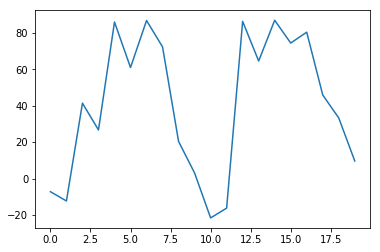

In [189]:
hoge = q_table[:,:,1].ravel()
plt.plot(hoge)
plt.show()

In [190]:
#hoge = q_table.transpose((2,0,1,3,4))
hoge = q_table.transpose((2,0,1,3,4))
fuga = hoge.reshape((hoge.shape[0],-1))
plt.pcolor( fuga.T, cmap='bwr' )
plt.show()

ValueError: axes don't match array

In [46]:
import math
math.radians(12)

0.20943951023931956

In [168]:
'''
https://medium.com/@tuzzer/cart-pole-balancing-with-q-learning-b54c6068d947
''' 
import gym
import numpy as np
import random
import math
from time import sleep
from __future__ import division

## Initialize the "Cart-Pole" environment
env = gym.make('CartPole-v0')

## Defining the environment related constants

# Number of discrete states (bucket) per state dimension
NUM_BUCKETS = (1, 1, 6, 3)  # (x, x', theta, theta')
# Number of discrete actions
NUM_ACTIONS = env.action_space.n # (left, right)
# Bounds for each discrete state
STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))
STATE_BOUNDS[1] = [-0.5, 0.5]
STATE_BOUNDS[3] = [-math.radians(50), math.radians(50)]
# Index of the action
ACTION_INDEX = len(NUM_BUCKETS)

## Creating a Q-Table for each state-action pair
q_table = np.zeros(NUM_BUCKETS + (NUM_ACTIONS,))

## Learning related constants
MIN_EXPLORE_RATE = 0.01
MIN_LEARNING_RATE = 0.1

## Defining the simulation related constants
NUM_EPISODES = 1000
MAX_T = 250
STREAK_TO_END = 120
SOLVED_T = 199
DEBUG_MODE = False

def simulate():

    ## Instantiating the learning related parameters
    learning_rate = get_learning_rate(0)
    explore_rate = get_explore_rate(0)
    discount_factor = 0.99  # since the world is unchanging

    num_streaks = 0

    for episode in range(NUM_EPISODES):

        # Reset the environment
        obv = env.reset()

        # the initial state
        state_0 = state_to_bucket(obv)

        for t in range(MAX_T):
            env.render()

            # Select an action
            action = select_action(state_0, explore_rate)

            # Execute the action
            obv, reward, done, _ = env.step(action)

            # Observe the result
            state = state_to_bucket(obv)

            # Update the Q based on the result
            best_q = np.amax(q_table[state])
            q_table[state_0 + (action,)] += learning_rate*(reward + discount_factor*(best_q) - q_table[state_0 + (action,)])

            # Setting up for the next iteration
            state_0 = state

            # Print data
            if (DEBUG_MODE):
                print("\nEpisode = %d" % episode)
                print("t = %d" % t)
                print("Action: %d" % action)
                print("State: %s" % str(state))
                print("Reward: %f" % reward)
                print("Best Q: %f" % best_q)
                print("Explore rate: %f" % explore_rate)
                print("Learning rate: %f" % learning_rate)
                print("Streaks: %d" % num_streaks)

                print("")

            if done:
               print("Episode %d finished after %f time steps" % (episode, t))
               if (t >= SOLVED_T):
                   num_streaks += 1
               else:
                   num_streaks = 0
               break

            #sleep(0.25)

        # It's considered done when it's solved over 120 times consecutively
        if num_streaks > STREAK_TO_END:
            break

        # Update parameters
        explore_rate = get_explore_rate(episode)
        learning_rate = get_learning_rate(episode)


def select_action(state, explore_rate):
    # Select a random action
    if random.random() < explore_rate:
        action = env.action_space.sample()
    # Select the action with the highest q
    else:
        action = np.argmax(q_table[state])
    return action


def get_explore_rate(t):
    return max(MIN_EXPLORE_RATE, min(1, 1.0 - math.log10((t+1)/25)))

def get_learning_rate(t):
    return max(MIN_LEARNING_RATE, min(0.5, 1.0 - math.log10((t+1)/25)))

def state_to_bucket(state):
    bucket_indice = []
    for i in range(len(state)):
        if state[i] <= STATE_BOUNDS[i][0]:
            bucket_index = 0
        elif state[i] >= STATE_BOUNDS[i][1]:
            bucket_index = NUM_BUCKETS[i] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = STATE_BOUNDS[i][1] - STATE_BOUNDS[i][0]
            offset = (NUM_BUCKETS[i]-1)*STATE_BOUNDS[i][0]/bound_width
            scaling = (NUM_BUCKETS[i]-1)/bound_width
            bucket_index = int(round(scaling*state[i] - offset))
        bucket_indice.append(bucket_index)
    return tuple(bucket_indice)


simulate()


Episode 0 finished after 13.000000 time steps
Episode 1 finished after 8.000000 time steps
Episode 2 finished after 20.000000 time steps
Episode 3 finished after 8.000000 time steps
Episode 4 finished after 36.000000 time steps
Episode 5 finished after 26.000000 time steps
Episode 6 finished after 13.000000 time steps
Episode 7 finished after 23.000000 time steps
Episode 8 finished after 15.000000 time steps
Episode 9 finished after 15.000000 time steps
Episode 10 finished after 12.000000 time steps
Episode 11 finished after 19.000000 time steps
Episode 12 finished after 45.000000 time steps
Episode 13 finished after 11.000000 time steps
Episode 14 finished after 33.000000 time steps
Episode 15 finished after 10.000000 time steps
Episode 16 finished after 52.000000 time steps
Episode 17 finished after 14.000000 time steps
Episode 18 finished after 8.000000 time steps
Episode 19 finished after 20.000000 time steps
Episode 20 finished after 10.000000 time steps
Episode 21 finished after 

Episode 173 finished after 199.000000 time steps
Episode 174 finished after 199.000000 time steps
Episode 175 finished after 199.000000 time steps
Episode 176 finished after 71.000000 time steps
Episode 177 finished after 26.000000 time steps
Episode 178 finished after 30.000000 time steps
Episode 179 finished after 199.000000 time steps
Episode 180 finished after 199.000000 time steps
Episode 181 finished after 199.000000 time steps
Episode 182 finished after 199.000000 time steps
Episode 183 finished after 199.000000 time steps
Episode 184 finished after 199.000000 time steps
Episode 185 finished after 199.000000 time steps
Episode 186 finished after 199.000000 time steps
Episode 187 finished after 199.000000 time steps
Episode 188 finished after 199.000000 time steps
Episode 189 finished after 199.000000 time steps
Episode 190 finished after 199.000000 time steps
Episode 191 finished after 199.000000 time steps
Episode 192 finished after 199.000000 time steps
Episode 193 finished af

AttributeError: 'NoneType' object has no attribute 'flip'

In [19]:
a  = 10
%qtconsole


In [5]:
%matplotlib
plt.ion()
plt.figure()
for i in range(100):
    plt.plot([i], [i], 'o')
    plt.draw()
    plt.pause(0.0001)

Using matplotlib backend: Qt5Agg
